In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import cv2
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [5]:
def split_TR_TS(input, output):
    X_train, X_test, y_train, y_test = train_test_split(input, output, test_size=0.2, random_state=42)
    print("Train Split report:")
    print(f"X_train:{X_train.shape}")
    print(f"y_train:{y_train.shape}")

    print("\nTest Split report:")
    print(f"X_test:{X_test.shape}")
    print(f"y_test:{y_test.shape}")

    return X_train, X_test, y_train, y_test

def std_scaler_transform(data):
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    data_scaled = pd.DataFrame(data_scaled)
    data_scaled.columns = data.columns
    data_scaled.index = data.index

    return data_scaled

def predict_data(X_train, y_train, algo):
    algo.fit(X_train, y_train)
    prediction = algo.predict(X_train)

    print(classification_report(y_train, prediction))
    return prediction

In [6]:
path = "../Dataset/diabetes.csv"
data = pd.read_csv(path)
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [7]:
COLS = ["BloodPressure", "Glucose", "Age", "Outcome"]
final_data = data[COLS]
final_data

,BloodPressure,Glucose,Age,Outcome
0,72,148,50,1
1,66,85,31,0
2,64,183,32,1
3,66,89,21,0
4,40,137,33,1
...,...,...,...,...
763,76,101,63,0
764,70,122,27,0
765,72,121,30,0
766,60,126,47,1


In [8]:
final_data.duplicated().sum()

3

In [9]:
final_data = final_data.drop_duplicates(keep="last")

# Simple EDA

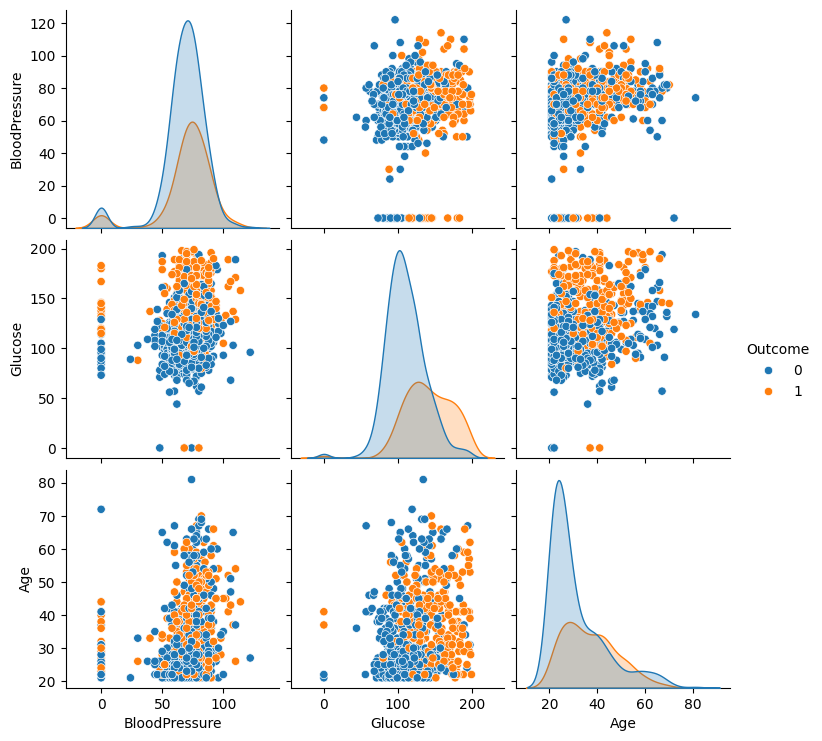

In [10]:
sns.pairplot(data= final_data, hue="Outcome")

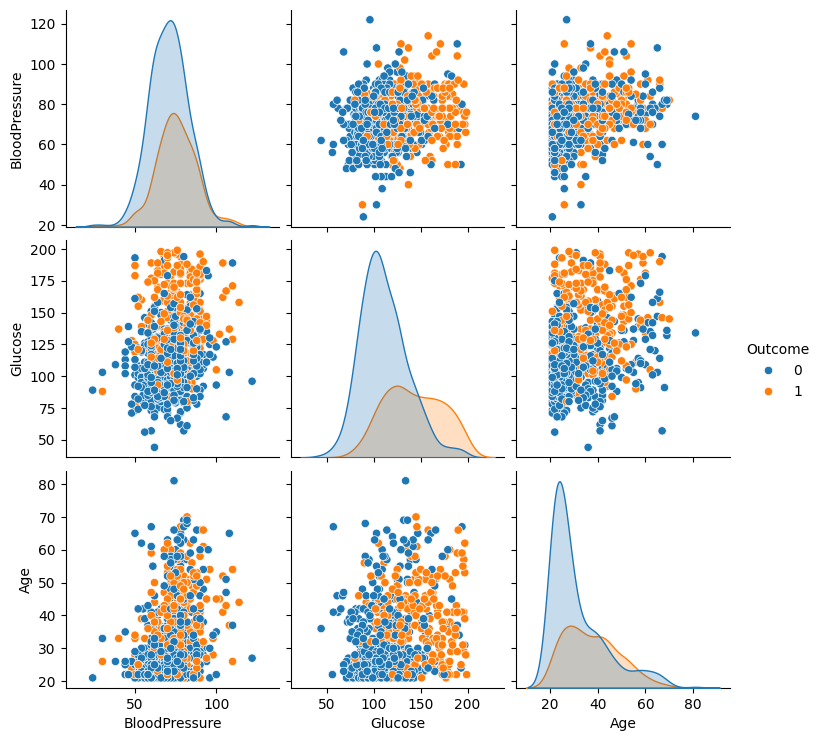

In [11]:
## only include legitimate data
cleaned_data = final_data.query("BloodPressure > 0 & Glucose > 0 & Age > 0")
sns.pairplot(data=cleaned_data, hue="Outcome")

# Class Balance

In [12]:
cleaned_data["Outcome"].value_counts()

Outcome
0    475
1    250
Name: count, dtype: int64

In [13]:
count_nonDia, count_Dia = cleaned_data["Outcome"].value_counts().values[0], cleaned_data["Outcome"].value_counts().values[1]

In [14]:
print(f"Ratio of non-diabetes and diabetes class: {round(count_Dia / count_nonDia, 2)}")

Ratio of non-diabetes and diabetes class: 0.53


# Split input output

In [15]:
X = cleaned_data.drop(columns="Outcome") ; y = cleaned_data["Outcome"]
X.head()

,BloodPressure,Glucose,Age
0,72,148,50
1,66,85,31
2,64,183,32
3,66,89,21
4,40,137,33


In [16]:
y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

# Split Train Test

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"\nX_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (580, 3)
y_train shape: (580,)

X_test shape: (145, 3)
y_test shape: (145,)


# dummy Modelling

In [18]:
from sklearn.dummy import DummyClassifier
from sklearn.metrics import classification_report

clf_dummy = DummyClassifier(strategy="most_frequent", random_state=42)
clf_dummy.fit(X_train, y_train)

y_train_pred_dum = clf_dummy.predict(X_train)
print(classification_report(y_train, y_train_pred_dum))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       374
           1       0.00      0.00      0.00       206

    accuracy                           0.64       580
   macro avg       0.32      0.50      0.39       580
weighted avg       0.42      0.64      0.51       580



E:\01_Programming\Py\pythonProject\Stat_Mo\Aditya_venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\01_Programming\Py\pythonProject\Stat_Mo\Aditya_venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
E:\01_Programming\Py\pythonProject\Stat_Mo\Aditya_venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

**Baseline Prior Class Probability in Training Data**

- calculate probability of each class
- calculate proportion of each class in training data
- calculate class odds based on prior probability

In [19]:
y_test.value_counts(normalize=True)

Outcome
0    0.696552
1    0.303448
Name: proportion, dtype: float64

In [20]:
proportion_majority = y_train.value_counts(normalize=True).values[0].round(3)
proba_majority = y_test.value_counts(normalize=True).values[0].round(3)

odds_majority = proportion_majority * proba_majority
odds_majority

0.449565

In [21]:
proportion_minority = y_train.value_counts(normalize=True).values[1].round(3)
proba_minority = y_test.value_counts(normalize=True).values[1].round(3)

odds_minority = proportion_minority * proba_minority
odds_minority

0.107565

In [22]:
total_odds = odds_majority + odds_minority
print(f"Total odds is calculated at: {total_odds}")

Total odds is calculated at: 0.55713


other way to do is using the stratified strategy of DummyClassifier

In [23]:
clf_stra_dummy = DummyClassifier(strategy="stratified", random_state=42)
clf_stra_dummy.fit(X_train, y_train)

y_train_dum_stra = clf_stra_dummy.predict(X_train)
print(classification_report(y_train, y_train_dum_stra))

              precision    recall  f1-score   support

           0       0.66      0.65      0.66       374
           1       0.39      0.40      0.39       206

    accuracy                           0.56       580
   macro avg       0.52      0.53      0.53       580
weighted avg       0.56      0.56      0.56       580



# SVM Exploration

In [24]:
from sklearn import datasets
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.preprocessing import PolynomialFeatures

In [25]:
iris = datasets.load_iris()
X_ir = iris["data"][:, (2,3)] #  only include petal length and height
y_ir = (iris["target"] == 2).astype(np.float64) # Iris-Virginica
df_ir = pd.DataFrame(X_ir, columns=["petal length", "petal width"])
df_ir["target"] = y_ir
df_ir.head()

,petal length,petal width,target
0,1.4,0.2,0.0
1,1.4,0.2,0.0
2,1.3,0.2,0.0
3,1.5,0.2,0.0
4,1.4,0.2,0.0


In [26]:
df_ir["target"].value_counts()

target
0.0    100
1.0     50
Name: count, dtype: int64

In [27]:
X_ir = df_ir[["petal length", "petal width"]]
y_ir = df_ir["target"]

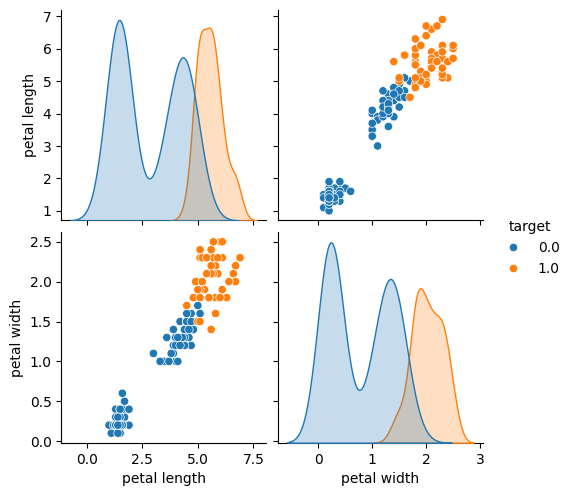

In [28]:
sns.pairplot(data=df_ir, hue="target")

In [29]:
X_ir_tr, X_ir_ts, y_ir_tr, y_ir_ts = split_TR_TS(X_ir, y_ir)

Train Split report:
X_train:(120, 2)
y_train:(120,)

Test Split report:
X_test:(30, 2)
y_test:(30,)


### Theory Margin / Hard / Soft Margin

<img src="../images/SVC_rats.PNG" text="rats plane" width=500> <br>
https://www.youtube.com/watch?v=efR1C6CvhmE&t=1091s

*intuition*
Red dots represent mice that are not obese, while the grey/green dots represent mice that are obese. A Threshold between these variables can be used to predict future mass observation to classify wether a mouse is obese or not. By using the edge datapoint from each class as a reference, a threshold which sits in the middle of the two classes (**Margin**) can more or less sensibly predict which classes the observation belongs to. The threshold with largest margin to make classification is called **Maximum Margin Classifier**

*Problem*
what if there's outlier like shown below?
<img src="../images/SVC_outlier.PNG" width=500>
Here we have an outlier of non-obese that are much closer to the obese observation, thus making our MMC closer to the obese class.

<img src="../images/SVC_outlier2.PNG" width=500><br>
When a new observation (black dot) is located around the outlier, it will be classified as non-obese by our MMC even tough most of the non-obese observation are located further away than the obese observation. Choosing a threshold that allows miss classification can help our classifier to generalize better. This method is called **Soft Margin**

*Soft Margin Classifier / Support Vector Classifier*
To determine the degree of missclassification, we use cross validation to determine how many missclassification and observations to be allowed inside of the best margin to geht the best classification

- CV at 1
<img src="../images/SVC_outlier3.PNG" width=500><br>
- CV at max
<img src="../images/SVC_outlier4.PNG" width=500><br>

#### Linear SVC

In [30]:
clf_LinSVC = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C=1, loss="hinge")),
])

clf_LinSVC.fit(X_ir_tr, y_ir_tr)

y_ir_pred = predict_data(X_ir_tr, y_ir_tr, algo=clf_LinSVC)

              precision    recall  f1-score   support

         0.0       0.95      0.96      0.96        81
         1.0       0.92      0.90      0.91        39

    accuracy                           0.94       120
   macro avg       0.94      0.93      0.93       120
weighted avg       0.94      0.94      0.94       120



<img src="../images/SVC_polyStart.PNG" text="rats plane" width=500>

Eventough linear SVM can work exceptionally well in some cases, many datasets are not suitable to be linearly seperable. One Approach is to add more features such as polynomial.This class distribution shows how linear SVC might not work in many cases i.e: specific amount of drug dose has to be administered, higher dose is dangerous and lower dose may be ineffective for the patient. <br>

We can add a polynomial features to create a boundary condition, in this case we can square the dosages to see wether a boundary condition can be drawn.
<img src="../images/SVC_poly1.PNG" text="rats plane" width=500> <br>
by bringing the data into higher dimensions, a new more precise boundary line for the SVC can be used to classify new observation of doses. the appropriate dimensions can be objectively selected by cross validation.

#### Polynomial SVC

In [31]:
clf_PolySVC = Pipeline([
    ("poly_features", PolynomialFeatures(degree=3)),
    ("scaler", StandardScaler()),
    ("clf_PolySVC", LinearSVC(C=10, loss="hinge"))
])

clf_PolySVC.fit(X_ir_tr, y_ir_tr)

y_ir_poly_pred = predict_data(X_ir_tr, y_ir_tr, clf_PolySVC)

              precision    recall  f1-score   support

         0.0       0.97      0.96      0.97        81
         1.0       0.93      0.95      0.94        39

    accuracy                           0.96       120
   macro avg       0.95      0.96      0.95       120
weighted avg       0.96      0.96      0.96       120



#### Polynomial-kernel SVC

adding polynomial features can work with all sorts of machine learning algorithms but low polynomial degree can not deal with complex dataset and a high polynomial degree creates huge number of features which slows down the model performance <br>

The kernel-trick in SVM makes it possible to generate similar result with polynomial features without having to actually transform the data into higher space -> important to reduce computational time. This trick is implemented in SVC class.

Illustration:
<img src="../images/SVC_poly.PNG" alt="poly_kernel" width="500">

In [34]:
clf_Polykernel_SVC = Pipeline([
    ("scaler", StandardScaler()),
    ("clf_Polykernel_SVC", SVC(kernel="poly", degree=2, coef0=1, C=5))
])

clf_Polykernel_SVC.fit(X_ir_tr, y_ir_tr)

predict_PolKern = predict_data(X_ir_tr, y_ir_tr, clf_Polykernel_SVC)

              precision    recall  f1-score   support

         0.0       0.96      0.96      0.96        81
         1.0       0.92      0.92      0.92        39

    accuracy                           0.95       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.95      0.95      0.95       120



#### Gaussian Radial Basis Function (RBF) - SVC

The RBF-Kernel find the SVC in **infinite dimensions**. The radial kernel behaves like a **weighted nearest neighbor** model at which the closest neighbors have a lot of influence on the classification of new observation and observations that are further away have relatively little influence on the classification
<img src="../images/SVC_rbf.PNG" width=500> <br>

**Then the new observation will be classified as non-obese!**


more illustration:
<img src="../images/SVC_rbf_final.PNG">

# Compare with SVM Method

In [35]:
from sklearn.svm import SVC

clf_svc = SVC(kernel="linear", C = 100)
clf_svc.fit(X_train, y_train)

SVC(C=100, kernel='linear')

In [36]:
predict_svm = clf_svc.predict(X_train)
print(classification_report(y_train, predict_svm))

              precision    recall  f1-score   support

           0       0.77      0.85      0.80       374
           1       0.66      0.53      0.59       206

    accuracy                           0.73       580
   macro avg       0.71      0.69      0.70       580
weighted avg       0.73      0.73      0.73       580

